.groupby, .pivot.table, and .resampling

.groupby = split + apply + combine
splits data by keys, can apply function

ie we have data {A:1, A:4, B:2, B:4}, A's would be placed together

## .groupby

In [5]:
import pandas as pd

# load drinks data
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/drinks.csv'
drinks = pd.read_csv(path, index_col='country')


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa
...,...,...,...,...,...
Venezuela,333,100,3,7.7,South America
Vietnam,111,2,1,2.0,Asia
Yemen,6,0,0,0.1,Asia


In [6]:
# calculate average beer servings across entire dataset
drinks.beer_servings.mean()

106.16062176165804

In [11]:
# average beer servings just for countries in Africa
drinks.loc[(drinks.continent == 'Africa')].beer_servings.mean()

61.471698113207545

In [13]:
# average beer servings for each continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

<AxesSubplot:xlabel='continent'>

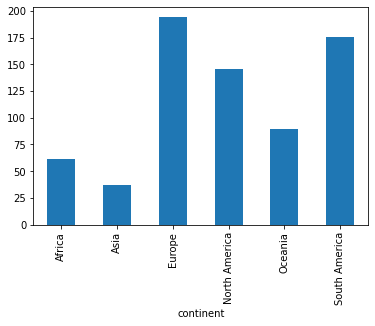

In [15]:
drinks.groupby('continent').beer_servings.mean().plot.bar()

In [17]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


<AxesSubplot:xlabel='continent'>

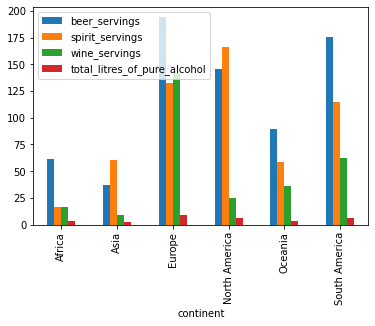

In [18]:
drinks.groupby('continent').mean().plot.bar()

In [19]:
# use aggrgation function, ie max - min
def peak_to_peak(group):
    return group.max() - group.min()

In [20]:
# apply custom function from above
drinks.groupby('continent').beer_servings.apply(peak_to_peak)

continent
Africa           376
Asia             247
Europe           361
North America    284
Oceania          306
South America    240
Name: beer_servings, dtype: int64

In [22]:
# top 5 wine servings countries in each continent
def top5_wine(group):
    return group.sort_values('wine_servings', ascending=False).head(5)
drinks.groupby('continent').apply(top5_wine)

beer_servings  spirit_servings  \
continent     country                                               
Africa        Equatorial Guinea               92                0   
              Sao Tome & Principe             56               38   
              South Africa                   225               76   
              Gabon                          347               98   
              Seychelles                     157               25   
Asia          Laos                            62                0   
              Russian Federation             247              326   
              Turkmenistan                    19               71   
              Lebanon                         20               55   
              Syria                            5               35   
Europe        France                         127              151   
              Portugal                       194               67   
              Andorra                        245              138   
              Switzerland                    185              100   
              Denmark                        224               81   
North America Canada                         240              122   
              USA                            249              158   
              St. Lucia                      171              315   
              Bahamas                        122              176   
              Antigua & Barbuda              102              128   
Oceania       Australia                      261               72   
              New Zealand                    203               79   
              Cook Islands                     0              254   
              Samoa                          105               18   
              Palau                          306               63   
South America Argentina                      193               25   
              Uruguay                        115               35   
              Chile                          130              124   
              Paraguay                       213              117   
              Peru                           163              160   

                                   wine_servings  \
continent     country                              
Africa        Equatorial Guinea              233   
              Sao Tome & Principe            140   
              South Africa                    81   
              Gabon                           59   
              Seychelles                      51   
Asia          Laos                           123   
              Russian Federation              73   
              Turkmenistan                    32   
              Lebanon                         31   
              Syria                           16   
Europe        France                         370   
              Portugal                       339   
              Andorra                        312   
              Switzerland                    280   
              Denmark                        278   
North America Canada                         100   
              USA                             84   
              St. Lucia                       71   
              Bahamas                         51   
              Antigua & Barbuda               45   
Oceania       Australia                      212   
              New Zealand                    175   
              Cook Islands                    74   
              Samoa                           24   
              Palau                           23   
South America Argentina                      221   
              Uruguay                        220   
              Chile                          172   
              Paraguay                        74   
              Peru                            21   

                                   total_litres_of_pure_alcohol      continent  
continent     country                                                           

In [23]:
# multiple functions can be applied
drinks.groupby('continent').beer_servings.agg(['mean','max','min',peak_to_peak])

,mean,max,min,peak_to_peak
continent,,,,
Africa,61.471698,376,0,376
Asia,37.045455,247,0,247
Europe,193.777778,361,0,361
North America,145.434783,285,1,284
Oceania,89.687500,306,0,306
South America,175.083333,333,93,240


In [24]:
# loc example
drinks.loc[drinks.beer_servings == 0]

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Bangladesh,0,0,0,0.0,Asia
Cook Islands,0,254,74,5.9,Oceania
North Korea,0,0,0,0.0,Asia
Iran,0,0,0,0.0,Asia
Kuwait,0,0,0,0.0,Asia
Libya,0,0,0,0.0,Africa
Maldives,0,0,0,0.0,Asia
Marshall Islands,0,0,0,0.0,Oceania


In [25]:
# load tips dataset
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/tips.csv'
tips = pd.read_csv(path)
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [26]:
# create new column, named tip_pct (tip percentage)
tips['tip_pct'] = 100*tips.tip/tips.total_bill
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.944673
1,10.34,1.66,No,Sun,Dinner,3,16.054159
2,21.01,3.50,No,Sun,Dinner,3,16.658734
3,23.68,3.31,No,Sun,Dinner,2,13.978041
4,24.59,3.61,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,No,Sat,Dinner,2,9.820426


In [30]:
tips.groupby(['day', 'smoker']).tip_pct.mean() # this creates a multi index

day   smoker
Fri   No        15.165044
      Yes       17.478305
Sat   No        15.804766
      Yes       14.790607
Sun   No        16.011294
      Yes       18.725032
Thur  No        16.029808
      Yes       16.386327
Name: tip_pct, dtype: float64

In [34]:
# apply .unstack to above data
tips.groupby(['day', 'smoker']).tip_pct.mean().unstack(level=0) # formats data from above better

day,Fri,Sat,Sun,Thur
smoker,,,,
No,15.165044,15.804766,16.011294,16.029808
Yes,17.478305,14.790607,18.725032,16.386327


## Pivot Table

In [36]:
# alternatively use a pivot_table
tips.pivot_table('tip_pct', index='day', columns='smoker', aggfunc='mean')

smoker,No,Yes
day,,
Fri,15.165044,17.478305
Sat,15.804766,14.790607
Sun,16.011294,18.725032
Thur,16.029808,16.386327


## Resampling

In [46]:
# load bycicle counter data. The file is in the same directory. Set directory to Date and apply pandas date format
path = 'Fremont_Bridge_Bicycle_Counter.csv'
fremont = pd.read_csv(path, index_col='Date', parse_dates=True)
fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2022-07-31 19:00:00,134.0,70.0,64.0
2022-07-31 20:00:00,108.0,44.0,64.0
2022-07-31 21:00:00,75.0,46.0,29.0


In [48]:
# reformat table
fremont.columns=['Total', 'East', 'West']
fremont

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2022-07-31 19:00:00,134.0,70.0,64.0
2022-07-31 20:00:00,108.0,44.0,64.0
2022-07-31 21:00:00,75.0,46.0,29.0


<AxesSubplot:xlabel='Date'>

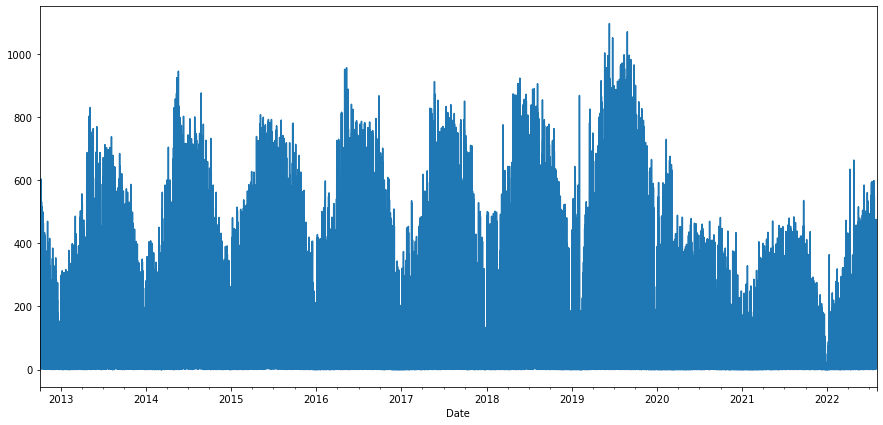

In [51]:
# create plot
fremont.Total.plot(figsize=(15,7))

<AxesSubplot:xlabel='Date'>

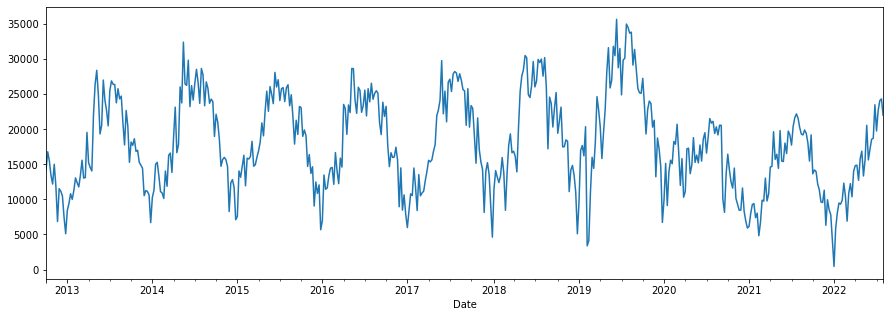

In [58]:
fremont.Total.resample('W').sum().plot(figsize=(15,5)) # daily count

<AxesSubplot:xlabel='time'>

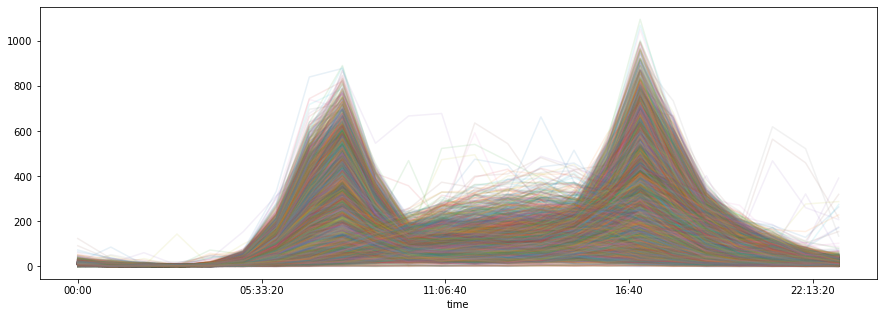

In [62]:
# plot X = time of day and Y = date
fremont.pivot_table('Total', index=fremont.index.time, columns=fremont.index.date).plot(figsize=(15,5), legend=False, alpha = 0.1)

<AxesSubplot:xlabel='time'>

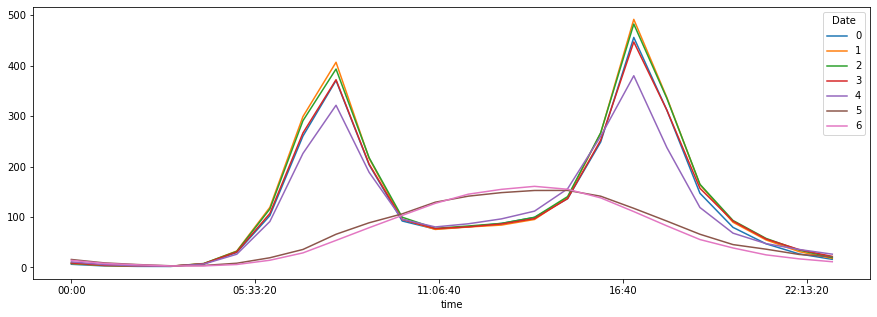

In [77]:
# average daily count by day of the week
fremont.pivot_table('Total', columns=fremont.index.dayofweek, index=fremont.index.time, aggfunc='mean').plot(figsize=(15,5))

In [80]:
table = fremont.pivot_table('Total', index=fremont.index.time, columns=fremont.index.date)
table.head()

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,16.0,18.0,29.0,5.0,5.0,11.0,8.0,8.0,47.0,36.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,2.0,12.0,12.0,7.0,4.0,1.0,3.0,2.0,24.0,19.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,1.0,10.0,15.0,3.0,4.0,5.0,3.0,4.0,10.0,8.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,9.0,6.0,4.0,1.0,1.0,2.0,4.0,5.0,7.0,4.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,10.0,6.0,4.0,7.0,7.0,7.0,11.0,7.0,3.0,4.0


In [85]:
# print counts at 11 PM
table.loc[:,table.iloc[23] >= 100] # july 4th celebrations and game on 26th


,2013-07-04,2013-07-06,2014-07-04,2015-07-04,2016-07-04,2016-07-08,2017-07-04,2017-07-07,2018-06-29,2018-07-04,2019-07-04,2019-07-26,2022-07-04
00:00:00,23.0,31.0,20.0,22.0,18.0,8.0,10.0,23.0,9.0,29.0,14.0,13.0,5.0
01:00:00,14.0,9.0,15.0,14.0,6.0,2.0,11.0,8.0,6.0,9.0,11.0,7.0,5.0
02:00:00,61.0,5.0,6.0,4.0,3.0,3.0,1.0,7.0,6.0,5.0,7.0,1.0,1.0
03:00:00,6.0,9.0,6.0,5.0,0.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
04:00:00,4.0,8.0,9.0,3.0,3.0,4.0,8.0,5.0,11.0,7.0,4.0,12.0,6.0
05:00:00,17.0,15.0,20.0,12.0,9.0,20.0,12.0,43.0,48.0,18.0,8.0,34.0,7.0
06:00:00,32.0,39.0,27.0,39.0,30.0,122.0,31.0,164.0,121.0,35.0,40.0,165.0,22.0
07:00:00,59.0,72.0,61.0,73.0,30.0,306.0,64.0,397.0,349.0,73.0,52.0,437.0,33.0
08:00:00,108.0,115.0,126.0,136.0,59.0,392.0,99.0,542.0,474.0,161.0,115.0,641.0,68.0
09:00:00,137.0,161.0,155.0,149.0,87.0,219.0,198.0,315.0,269.0,130.0,140.0,362.0,116.0
